In [1]:
import numpy as np 
import pandas as pd
import thinkstats2
import thinkplot
import first
import nsfg
import matplotlib.pyplot as plt

In [2]:
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [3]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

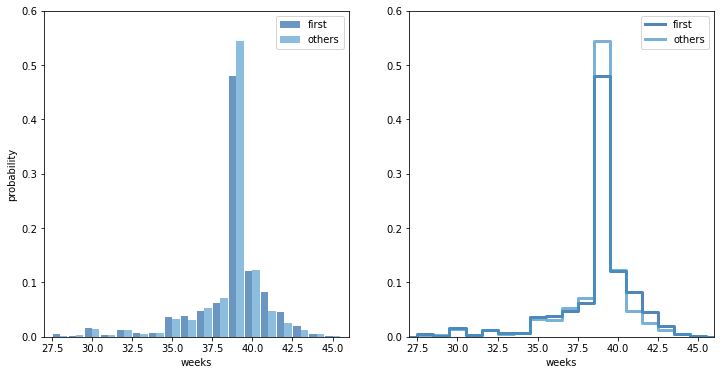

<Figure size 576x432 with 0 Axes>

In [4]:
width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27,46,0,0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=[27,46,0,0.6])

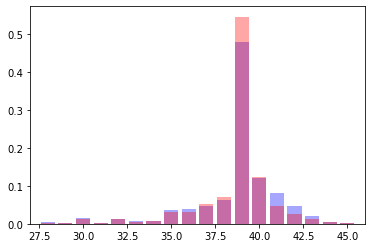

In [5]:
first_pmf2 = firsts.prglngth.value_counts(normalize=True).to_frame()
first_pmf2.columns = ['probability_first']
other_pmf2 = others.prglngth.value_counts(normalize=True).to_frame()
other_pmf2.columns = ['probability_other']

plt.xlim([27, 46])
plt.bar(first_pmf2.index, first_pmf2.probability_first, alpha=0.35, color='b')
plt.bar(other_pmf2.index, other_pmf2.probability_other, alpha=0.35, color='r')
plt.show()

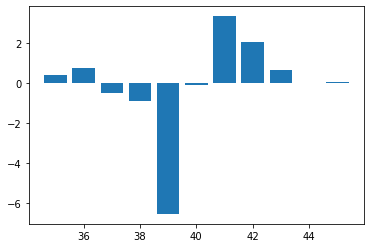

In [6]:
# comparing weekly pmf differences between others and firsts
pmf_combined = pd.merge(first_pmf2, other_pmf2,
                       left_index=True, right_index=True)

pmf_combined['pmf_diff'] = (pmf_combined.probability_first
                           - pmf_combined.probability_other)*100

weeks = range(35, 46)
diffs = [pmf_combined.loc[week].pmf_diff for week in weeks]
plt.bar(weeks, diffs)
plt.show()

In [7]:
class_dist = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(class_dist, label='actual')

In [8]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

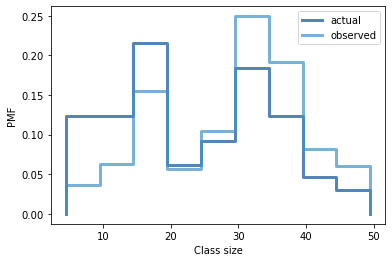

In [9]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [10]:
print('actual mean', pmf.Mean())
print('observed mean', biased_pmf.Mean())

actual mean 23.692307692307693
observed mean 29.123376623376625


In [11]:
# exercise...

In [12]:
resp = nsfg.ReadFemResp()
NUMKDHH = resp['numkdhh']

In [13]:
resp_pmf = NUMKDHH.value_counts(normalize=True).to_frame().reset_index()
resp_pmf.columns = ['num_children', 'PMF']
resp_pmf

,num_children,PMF
0,0,0.466178
1,1,0.214052
2,2,0.196258
3,3,0.087139
4,4,0.025644
5,5,0.010729


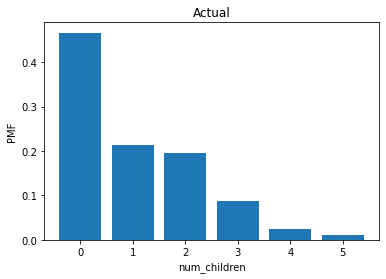

In [14]:
fig = plt.figure()
plt.title('Actual')
plt.bar(resp_pmf.num_children, resp_pmf.PMF)
plt.xlabel('num_children')
plt.ylabel('PMF')
plt.show()
fig.savefig('actual.png', transparent=False)

In [15]:
def my_bias_pmf(pmf):
    bias_pmf = pmf.num_children * pmf.PMF
    bias_pmf = bias_pmf.to_frame().reset_index()
    bias_pmf.columns = ['num_children', 'PMF']
    
    # normalize the pmf so it sums to 1.0
    bias_pmf['PMF'] = bias_pmf.PMF/bias_pmf.PMF.sum()
    
    return bias_pmf

pmf sum 1.0


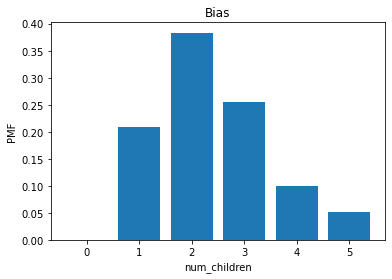

In [16]:
child_bias_pmf = my_bias_pmf(resp_pmf)
fig = plt.figure()
print('pmf sum', child_bias_pmf.PMF.sum())
plt.title('Bias')
plt.bar(child_bias_pmf.num_children, child_bias_pmf.PMF)
plt.xlabel('num_children')
plt.ylabel('PMF')
plt.show()
fig.savefig('bias.png')

In [17]:
def pmf_mean(pmf):
    # calculate mean for PMF 
    # sum of the weighted values i.e. x*p(x)
    weighted_vals = pmf.num_children * pmf.PMF 
    return weighted_vals.sum()

In [18]:
print('actual mean', pmf_mean(resp_pmf))
print('bias mean', pmf_mean(child_bias_pmf))

actual mean 1.024205155043831
bias mean 2.403679100664282


In [19]:
resp_pmf

,num_children,PMF
0,0,0.466178
1,1,0.214052
2,2,0.196258
3,3,0.087139
4,4,0.025644
5,5,0.010729


In [20]:
### markdown for lesson solutions in dsp

#### Actual:
![actual_pmf](actual.png)

#### Bias:
![bias_pmf](bias.png)

#### PMF means:
actual mean: 1.024205155043831 <br>
bias mean: 2.403679100664282